# This script contains the following:
## 1. Import libraries and data
## 2. Plot 2022 temperatures using pandas
## 3. Trip counts & dual axis plot
## 4. Explaining my code

### 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
# Check matplotlib version
print(matplotlib.__version__)

3.7.1


In [3]:
# Load the merged dataset
df = pd.read_csv("citibike_weather_merged_2022.csv", low_memory=False)


In [4]:
# Check columns
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avg_temp'],
      dtype='object')

In [5]:
# Check df
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avg_temp
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.10,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1


In [6]:
df.shape

(29838166, 15)

In [7]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avg_temp              float64
dtype: object

In [8]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [9]:
# Confirm it worked
df["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29838166 entries, 0 to 29838165
Series name: date
Non-Null Count     Dtype         
--------------     -----         
29838166 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 227.6 MB


In [10]:
# Aggregate to daily average temperature
daily_temp = (
    df.groupby("date")["avg_temp"]
      .mean()
      .reset_index()
)


In [11]:
# Check
daily_temp.head()


,date,avg_temp
0,2022-01-01,11.6
1,2022-01-02,11.4
2,2022-01-03,1.4
3,2022-01-04,-2.7
4,2022-01-05,3.2


In [12]:
daily_temp.shape

(365, 2)

### 2. Plot 2022 Temperatures using pandas

In [13]:
# 2022 rows
df_2022 = df.copy()

In [14]:
# Ensure 'avg_temp' is numeric
df_2022["avg_temp"] = pd.to_numeric(df_2022["avg_temp"], errors="coerce")

In [15]:
# Group by date to get one average temperature per day
daily_temp = (
    df_2022.groupby("date", as_index=False)["avg_temp"]
           .mean()
           .dropna(subset=["avg_temp"])
)


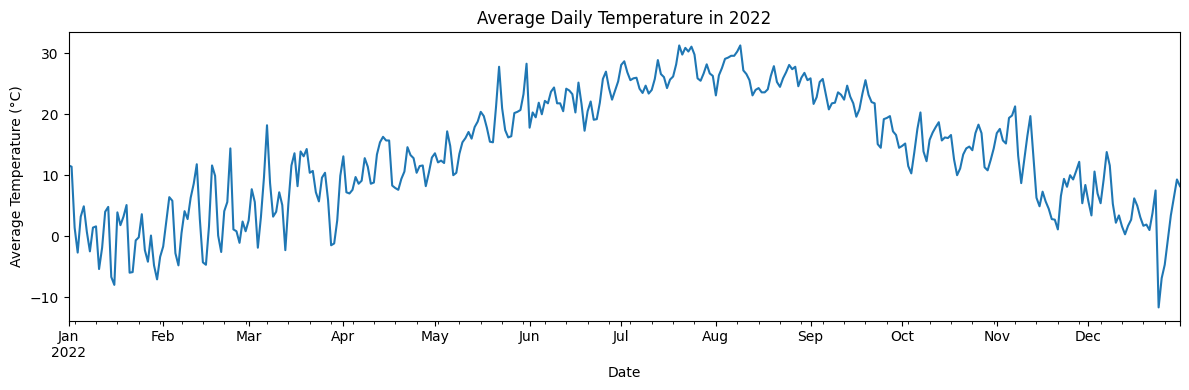

In [16]:
# Plot with pandas' built-in plotting function
ax = daily_temp.plot(
    x="date",
    y="avg_temp",
    kind="line",
    figsize=(12,4),
    title="Average Daily Temperature in 2022",
    legend=False
)
# Add axis labels
ax.set_xlabel("Date")
ax.set_ylabel("Average Temperature (°C)")
plt.tight_layout()
plt.savefig("temperature_2022_plot.png", dpi=300)
plt.show()

In [17]:
# Export dataframe
daily_temp.to_csv("daily_temperature_2022.csv", index=False)


### 3. Trip counts & dual axis plot

In [20]:
# Count trips per day in 2022 and create dataframe of trips and temps
daily_trips = (
    df_2022.groupby("date", as_index=False)
           .agg(trip_count=("ride_id", "count"), avg_temp=("avg_temp", "mean"))
)


In [21]:
# Check dataframe
daily_trips.head()

,date,trip_count,avg_temp
0,2022-01-01,20428,11.6
1,2022-01-02,43009,11.4
2,2022-01-03,33189,1.4
3,2022-01-04,36842,-2.7
4,2022-01-05,34230,3.2


In [22]:
# Check days
daily_trips["date"].nunique()


365

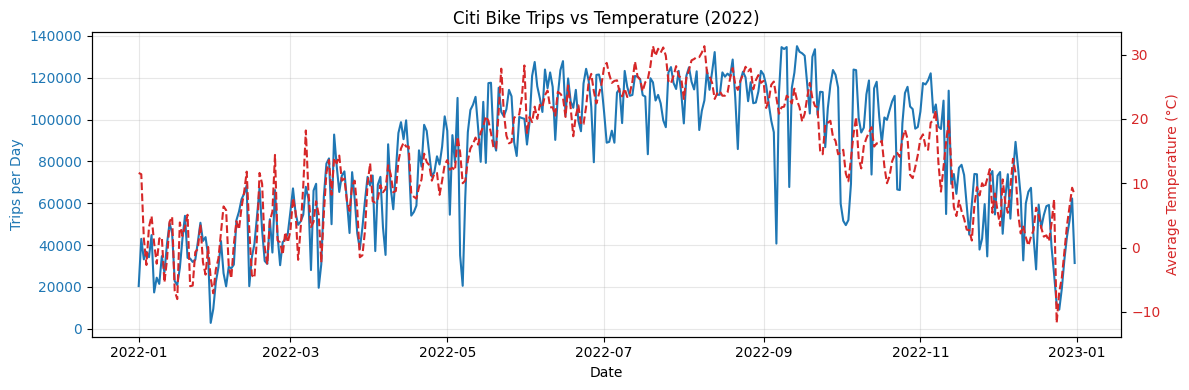

In [23]:
# Plot dual axis plot
fig, ax1 = plt.subplots(figsize=(12,4))

# Left y-axis represents the number of trips
ax1.plot(daily_trips["date"], daily_trips["trip_count"], color="tab:blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Trips per Day", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, alpha=0.3)

# Right y-axis represents avaerage daily temperature
ax2 = ax1.twinx()
ax2.plot(daily_trips["date"], daily_trips["avg_temp"], color="tab:red", linestyle="--")
ax2.set_ylabel("Average Temperature (°C)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Citi Bike Trips vs Temperature (2022)")
plt.tight_layout()

fig.savefig("trips_vs_temperature_2022.png", dpi=300, bbox_inches="tight")

plt.show()


#### 4. Explaining my code
- To cover steps 3 to 5, I first carried out data prep by converting the 'date' column to 'datetime' and aggregated to one row per day. 

- For the temperature plot, I used pandas' built in plotting. Pandas calls Matplotlib under the hood, creating axes and figures, which is good for quick exploratory plots.

- For the dual axis plot, I used Matplotlib's object orientated paradigm to gain more control. I created a figure and axis and plotted the trip_counts on ax1 and average temperature on ax2 and then set the title, labels, layout and grid. I also saved it and viewed it. 

- I used two paradigms - pandas plot (for quick exploratory plotting) and Matplotlib's OO (object orientated) paradigm for a dual axis plot. 

In [25]:
# Double check dates before saving
daily_trips["date"].min(), daily_trips["date"].max()


(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00'))

In [26]:
# Save daily trips dataframe
daily_trips.to_csv("daily_trips_vs_temp_2022.csv", index=False)